In [3]:
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def load_data(filename):
    df = pd.read_csv(filename)
    return(df)

In [10]:
directory_path = "/Users/karangm/Documents/NEU/Hackathon/wayfair_hack/input"
comp_products_df  = load_data(directory_path + '/' + 'comp_products.csv')
clickstreams_with_purchase_df = load_data(directory_path + '/' + 'clickstreams_with_purchase.csv')
orders_df = load_data(directory_path + '/' + 'orders.csv')
products_df = load_data(directory_path + '/' + 'products.csv')
clickstreams_without_purchase_df = load_data(directory_path + '/' + 'clickstreams_without_purchase.csv')
rental_prices_df = load_data(directory_path + '/' + 'rental_prices.csv')
sale_prices_df = load_data(directory_path + '/' + 'sale_prices.csv')
taxes_dictionary_df = load_data(directory_path + '/' + 'taxes_dictionary.csv')
taxes_df = load_data(directory_path + '/' + 'taxes.csv')

In [19]:
clickstreams_with_purchase_df.head()

,customer_id,date,time,page_viewed,product_id,ordered
0,1436364061643577713,2018-07-16,14:37:44,HOMEPAGE,0,0.0
1,1436364061643577713,2018-07-16,14:40:44,PRODUCTSIMPLESKU,205401096165894320,0.0
2,1436364061643577713,2018-07-16,14:42:39,PRODUCTSIMPLESKU,9220344733964903803,0.0
3,1436364061643577713,2018-07-16,14:42:53,PRODUCTSIMPLESKU,9220344733964903803,0.0
4,1436364061643577713,2018-07-16,14:44:46,KEYWORDSEARCH,0,0.0


In [27]:
clickstreams_with_purchase_df['page_viewed'].unique()

array(['HOMEPAGE', 'PRODUCTSIMPLESKU', 'KEYWORDSEARCH',
       'PRODUCTOPTIONSKU', 'SUPERBROWSECATEGORY1ATTRIBUTES',
       'CHECKOUTBASKET', 'CATEGORYSTANDARD', 'SUPERBROWSECATEGORY',
       'SUPERBROWSECATEGORY4+ATTRIBUTES',
       'SUPERBROWSECATEGORY3ATTRIBUTES', 'CHECKOUTONEPAGE',
       'SUPERBROWSEHOTDEALS', 'CATEGORYDEPARTMENT',
       'DAILYSALESSOLREVENTPAGE', 'SUPERBROWSECATEGORY2ATTRIBUTES',
       'PRODUCTKIT', 'DAILYSALESMAINPAGE', 'DAILYSALESPRODUCTPAGE',
       'DAILYSALESEVENTPAGE', 'BASKETLOADPAGE', 'DAILYSALESCLOSEOUTPAGE',
       'CATEGORYQUICKBROWSE', 'CHECKOUTPRODUCTUPSELLGROUP',
       'STLLANDINGPAGE', 'SAVETOBOARDMODALSCREEN'], dtype=object)

In [20]:
clickstreams_without_purchase_df.head()

,customer_id,date,time,page_viewed,product_id
0,3409430551488828751,2018-07-16,16:42:41,SUPERBROWSECATEGORY,0
1,3409430551488828751,2018-07-16,16:49:18,DAILYSALESMAINPAGE,0
2,3409430551488828751,2018-07-16,16:55:02,SUPERBROWSECATEGORY,0
3,3409430551488828751,2018-07-16,16:58:53,SUPERBROWSECATEGORY,0
4,6251099621655761396,2018-07-16,07:17:34,HOMEPAGE,0


In [28]:
clickstreams_without_purchase_df['page_viewed'].unique()

array(['SUPERBROWSECATEGORY', 'DAILYSALESMAINPAGE', 'HOMEPAGE',
       'CHECKOUTBASKET', 'PRODUCTOPTIONSKU', 'CATEGORYDEPARTMENT',
       'PRODUCTSIMPLESKU', 'KEYWORDSEARCH', 'CATEGORYSTANDARD',
       'SUPERBROWSECATEGORY1ATTRIBUTES', 'SUPERBROWSECATEGORY2ATTRIBUTES',
       'SUPERBROWSECATEGORY4+ATTRIBUTES',
       'SUPERBROWSECATEGORY3ATTRIBUTES', 'DAILYSALESSOLREVENTPAGE',
       'CATEGORYQUICKBROWSE', 'DAILYSALESEVENTPAGE',
       'SUPERBROWSEHOTDEALS', 'CHECKOUTPRODUCTUPSELLGROUP',
       'DAILYSALESPRODUCTPAGE', 'BASKETLOADPAGE', 'PRODUCTKIT',
       'DAILYSALESCLOSEOUTPAGE', 'STLLANDINGPAGE', 'CHECKOUTONEPAGE',
       'SAVETOBOARDMODALSCREEN'], dtype=object)

In [21]:
orders_df.head()

,order_product_id,order_id,wayfair_product_id,wayfair_website_id,order_date,order_time,customer_id,customer_zip,quantity_ordered
0,8.344710e+18,1.073040e+17,8.089580e+18,Wayfair,7/19/18,9:48:02,3.243950e+18,29464,1
1,7.897050e+18,9.115090e+17,4.407090e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
2,3.742700e+17,9.115090e+17,1.327620e+18,Wayfair,7/21/18,15:04:23,7.606760e+18,10928,1
3,7.072690e+18,5.760940e+18,7.293640e+18,Wayfair,7/22/18,21:56:42,3.106940e+18,6712,1
4,7.307240e+18,2.708890e+18,7.264500e+18,Wayfair,7/21/18,12:55:20,1.390570e+18,2468,1


In [22]:
products_df.head()

,website_name,product_id,product_name,category_name,description,manufacturer_name,weight,dimension_1,dimension_2,dimension_3,num_reviews,onsite_price,on_promotion
0,Joss US,2.794210e+18,Westgate Upholstered Panel Bed,Beds,The 1882 upholstered bed is sure to appeal to ...,Pulaski Furniture,116.0,59.25,87.50,68.75,7.0,409.99,0.0
1,Joss US,8.187820e+18,3 Piece Leah Bowl Set,"Boxes, Bins, Baskets, & Buckets",Stack green apples on the breakfast bar or dis...,Three Hands Co.,30.8,23.00,28.35,14.17,0.0,89.99,1.0
2,Joss US,7.241740e+18,Butter Cups/Ranunculus Sunshine Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,16.00,3.00,4.00,0.0,16.99,0.0
3,Joss US,4.112160e+18,Freesias Double Blooming Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,24.00,2.00,2.00,2.0,9.99,0.0
4,Joss US,7.667520e+18,Grand Freesia/Ranunculus Blend Bulb,Planting & Seeding,Start your own backyard garden or add spring s...,Van Zyverden Inc,1.0,36.00,3.00,2.00,2.0,9.99,0.0


In [36]:
products_df['category_name'].unique()

array(['Beds', 'Boxes, Bins, Baskets, & Buckets', 'Planting & Seeding',
       'Cake Pans', 'Hampers & Baskets', 'Bathroom Sink Faucets',
       'Tool Cabinets', 'Area Rugs', 'Mats', 'Ottomans', 'Bathroom Sinks',
       'Sofas', 'Wall Mounted Shelves', 'Dining Chairs', 'Coffee Makers',
       'Coffee Grinders', 'Sheds', 'Shelving & Racks',
       'Patio Dining Sets', 'TV Mounts', 'Accent Stools',
       'Speaker Stands', 'Blankets And Throws', 'Accent Pillows',
       'Bookcases', 'Desks', 'Filing Cabinets', 'Desk Parts', 'Planters',
       'Key Organizers', 'Accent Chairs', 'Kids Wall Décor', 'Sectionals',
       'Canopy Accessories', 'Kitchen Faucets',
       'Crock Pots & Slow Cookers', 'Sheets And Sheet Sets',
       'Mantel & Tabletop Clocks', 'Wall Clocks', 'Table Lamps',
       'Floor Lamps', 'Bar Stools', 'Chandeliers', 'Dressers & Chests',
       'Indoor & Outdoor Fountains', 'Tubs And Whirlpools',
       'Bedding Accessories', 'Pendant Lights', 'Signs & Sign Holders',
       

In [23]:
comp_products_df.head()

,comp_website_name,comp_product_id,comp_product_name,category_name,comp_description,comp_price
0,amazon,6597043735844019455,"Trademark Art Kathie McCurdy Colors of Green, ...",Wall Art,"Artist: Kathie McCurdy, Subject: Floral Style:...",71.99
1,amazon,6114697460212133124,"Pfister Raincan Showerhead, Polished Chrome",Shower Heads,"Rain spray provides more coverage and a soft, ...",21.00
2,amazon,743431437000632207,"Alno A7066-BRZ Spa 1 Modern Tissue Holder, Bro...",Toilet Paper Holders,Made by Alno Upc - 785584020087 Vendor Item Nu...,42.71
3,overstock,3528449255436755526,Premier Copper Products LO19RRDB Widespread Fa...,Bathroom Sinks,ITEM#: 15394278 ...,475.00
4,amazon,7102979767482509121,"Royal Designs Twisted Pleat Basic Lamp Shade, ...",Lighting Shades,Shade Dimensions: 6 x 12 x 9 (Top x Bottom x H...,64.95


In [34]:
comp_products_df['category_name'].unique()

array(['Wall Art', 'Shower Heads', 'Toilet Paper Holders', ...,
       'Modular Office Configurations', 'LCD Desks / Monitoring Consoles',
       "Children's Cooking & Baking"], dtype=object)

In [83]:
rental_prices_df.head()

,zipcode,city,state,metro,county,month,1_br_total,2_br_total,3_br_total,4_br_total,5+_br_total,1_br_psqft,2_br_psqft,3_br_psqft,4_br_psqft,5+_br_psqft,avg_house_size
0,10025,New York,NY,New York,New York,1,3025.0,3500.0,4495.0,4895.0,NaN,4.956723,4.573361,NaN,NaN,NaN,687.791883
1,10025,New York,NY,New York,New York,2,3040.5,3500.0,4495.0,4947.5,NaN,4.980536,4.600000,NaN,NaN,NaN,685.673013
2,10025,New York,NY,New York,New York,3,3000.0,3500.0,4500.0,5175.0,NaN,5.000000,4.505809,NaN,NaN,NaN,688.387505
3,10025,New York,NY,New York,New York,4,2975.0,3500.0,4500.0,5125.0,NaN,5.100000,4.660541,NaN,NaN,NaN,667.159592
4,10025,New York,NY,New York,New York,5,2995.0,3585.0,4449.0,5300.0,NaN,5.147404,4.691964,NaN,NaN,NaN,672.959503


In [82]:
sale_prices_df.head()

,zipcode,city,state,metro,county,month,1_br_total,2_br_total,3_br_total,4_br_total,5+_br_total,1_br_psqft,2_br_psqft,3_br_psqft,4_br_psqft,5+_br_psqft,avg_house_size
0,10023,New York,NY,New York,New York,1,1390000.0,2750000.0,4995000.0,6995000.0,NaN,1837.440469,1954.402452,2150.574529,2428.630363,NaN,1841.606540
1,10023,New York,NY,New York,New York,2,1285000.0,2670000.0,4995000.0,6995000.0,NaN,1825.863546,1916.946309,2084.483512,2434.027035,NaN,1841.683036
2,10023,New York,NY,New York,New York,3,1295000.0,2725000.0,4900000.0,7142500.0,NaN,1848.364718,1952.799602,2038.615572,2454.991817,NaN,1852.255520
3,10023,New York,NY,New York,New York,4,1392500.0,2737500.0,4900000.0,7295000.0,NaN,1866.158868,2041.995233,2035.001628,2469.947063,NaN,1862.037698
4,10023,New York,NY,New York,New York,5,1250000.0,2695000.0,4875000.0,6995000.0,NaN,1800.609185,2064.559516,2013.450327,2413.532078,NaN,1829.757899


In [17]:
taxes_dictionary_df.head()

,Field,Type,Description
0,A00100,INTEGER,Adjusted gross income (AGI)
1,A02650,INTEGER,Total income amount
2,N00200,INTEGER,Number of returns with salaries and wages
3,A00200,INTEGER,Salaries and wages amount
4,N00900,INTEGER,Number of returns with business or professiona...


In [26]:
taxes_df.head()

,state_fips,state,zipcode,agi_stub,num_returns,num_single,num_joint,num_hoh,num_dependents,num_elderly,...,N19300,A19300,N19500,A19500,N04800,A04800,N07220,A07220,N11901,A11901
0,1,AL,0,1,815440,477700,105350,221200,491310,150920,...,25020,5950,46930,74541,17910,82471,27490,15002,0,0
1,1,AL,0,2,495830,211930,142340,128890,360480,109680,...,64360,17611,102740,243301,44430,292180,43580,45248,0,0
2,1,AL,0,3,263390,83420,137870,36340,182880,75570,...,68320,19479,99920,337719,37110,278272,22780,29166,0,0
3,1,AL,0,4,167190,29420,124060,10610,130160,51540,...,58540,18167,79980,362811,24780,202113,17250,22630,0,0
4,1,AL,0,5,217440,20240,188080,4880,195990,68080,...,117980,44270,151920,1065202,34030,298272,20970,29469,390,155


In [198]:
def rank_by_mfr(data_frame):
    aux_df = data_frame[['product_id','category_name', 'manufacturer_name', 'onsite_price']]
    aux_df = aux_df.dropna(subset=['category_name', 'manufacturer_name', 'onsite_price'])
    aux_df_grouped = aux_df.groupby(['manufacturer_name', 'category_name'])['onsite_price'].mean()
    aux_df_grouped = aux_df_grouped.reset_index()
    ## Pivoting
    aux_df_spread = aux_df_grouped.pivot(index='manufacturer_name', columns='category_name', values='onsite_price')
    aux_df_spread = aux_df_spread.fillna(0)
    ## Ranking each column
    for column in aux_df_spread.columns:
        aux_df_spread[column] = aux_df_spread[column].rank(ascending=False)
    ## Ranking for each manufacture
    aux_df_spread = aux_df_spread.reset_index()
    aux_df_cols = list(aux_df_spread.columns)
    aux_df_cols.remove('manufacturer_name')
    aux_df_spread['sum'] = aux_df_spread.loc[:,aux_df_cols].sum(axis=1)
    return aux_df_spread[['manufacturer_name', 'sum']]

In [224]:
rank_by_mfr_df = rank_by_mfr(products_df)
## Rank the sum column
rank_by_mfr_df['sum'] = rank_by_mfr_df['sum'].rank(ascending=False)
rank_by_mfr_df.rename(columns={'sum': 'rank'}, inplace=True)
## divide into foure categories

q1 = rank_by_mfr_df['rank'].quantile(0.15)
q2 = rank_by_mfr_df['rank'].quantile(0.40)
q3 = rank_by_mfr_df['rank'].quantile(0.75)
print(q1, q2, q3)
## Replace with the quantiles

1267.5 3396.5 6364.0


In [229]:
rank_by_mfr_df['rank'] = ['high' if x < q1 else x for x in rank_by_mfr_df['rank']]
rank_by_mfr_df['rank'] = ['upper_med' if x != 'high' and x >= q1 and x < q2 else x for x in rank_by_mfr_df['rank']]
rank_by_mfr_df['rank'] = ['lower_med' if x!= 'high' and x != 'upper_med' and x >= q2 and x < q3 else x for x in rank_by_mfr_df['rank']]
rank_by_mfr_df['rank'] = ['low' if x != 'high' and x != 'upper_med' and x != 'lower_med' and x >= q3 else x for x in rank_by_mfr_df['rank']]

In [231]:
rank_by_mfr_df.head()

category_name,manufacturer_name,rank
0,!nspire,low
1,&'Costa,lower_med
2,100 Essentials,low
3,1000 West Inc,lower_med
4,123 Creations,lower_med


In [232]:
import pickle

In [233]:
with open(directory_path+"/dataset.pickle", 'rb') as handle:
    dataset = pickle.load(handle)


In [234]:
dataset.head(5)

,website_name,product_id,product_name,category_name,description,manufacturer_name,weight,dimension_1,dimension_2,dimension_3,...,population,county_fips,county_name,all_county_weights,imprecise,military,zipcode,status,city_y,Y
0,Wayfair US,7731653857710200000,Wood Floating Shelf,Wall Mounted Shelves,This is a handmade floating shelf which could ...,Loon Peak,14.00,5.0,8.0,38.0,...,37719.0,35043.0,Sandoval,{'35043':100},False,False,87144,Upper Mid,NaN,0.0
1,Wayfair US,8696454453367780000,Wayfair Basics Solid Room Darkening Grommet Si...,Curtains & Drapes,From adding another layer of interest to your ...,Wayfair Basics,0.75,84.0,0.1,40.0,...,37719.0,35043.0,Sandoval,{'35043':100},False,False,87144,Upper Mid,NaN,0.0
2,Wayfair US,6244071513776620000,Lisle 2 Drawer Nightstand,Nightstands,Finding a nightstand you love is essential. Th...,Lark Manor,37.00,24.0,16.0,22.0,...,37719.0,35043.0,Sandoval,{'35043':100},False,False,87144,Upper Mid,Rio Rancho,1.0
3,Wayfair US,6244071513776620000,Lisle 2 Drawer Nightstand,Nightstands,Finding a nightstand you love is essential. Th...,Lark Manor,37.00,24.0,16.0,22.0,...,37719.0,35043.0,Sandoval,{'35043':100},False,False,87144,Upper Mid,Rio Rancho,1.0
4,Wayfair US,3017044721996580000,Double Button Tufted Upholstered Panel Headboard,Headboards,Add comfort and luxury to your bedroom with th...,Skyline Furniture,31.00,51.0,4.0,56.0,...,37719.0,35043.0,Sandoval,{'35043':100},False,False,87144,Upper Mid,NaN,0.0


In [235]:
dataset.columns

Index(['website_name', 'product_id', 'product_name', 'category_name',
       'description', 'manufacturer_name', 'weight', 'dimension_1',
       'dimension_2', 'dimension_3', 'num_reviews', 'onsite_price',
       'on_promotion', 'order_product_id', 'order_id', 'wayfair_product_id',
       'wayfair_website_id', 'order_date', 'order_time', 'customer_id',
       'customer_zip', 'quantity_ordered', 'zip', 'lat', 'lng', 'city_x',
       'state_id', 'state_name', 'zcta', 'parent_zcta', 'population',
       'county_fips', 'county_name', 'all_county_weights', 'imprecise',
       'military', 'zipcode', 'status', 'city_y', 'Y'],
      dtype='object')

In [290]:
f_dataset = dataset[['customer_id', 'product_id', 'manufacturer_name', 'status', 'Y', 'on_promotion']]

In [291]:
f_dataset = f_dataset.merge(rank_by_mfr_df[['manufacturer_name', 'rank']], on='manufacturer_name')

In [292]:
model_data = f_dataset[['rank', 'status', 'on_promotion', 'Y']]

In [293]:
model_data_1 = model_data[model_data['Y']==1]
model_data_0 = model_data[model_data['Y']==0]

In [301]:
model_data_0 = model_data_0.sample(n=10339)
model_data = model_data_1.append(model_data_0).sample(frac=1).reset_index(drop=True)

In [302]:
dummy = pd.get_dummies(model_data[['rank', 'status']])

In [303]:
model_data_y = model_data['Y']
model_data_x = pd.concat([dummy, model_data[['on_promotion']]], axis=1)

0.15501446841687033

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [304]:
train_x, test_x, train_y, test_y = train_test_split(model_data_x, model_data_y, test_size=0.3)

In [305]:
lr = LogisticRegression()

In [306]:
lr.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [307]:
lr.score(test_x, test_y)

0.5357833655705996

In [308]:
pred_y = lr.predict(test_x)

In [311]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

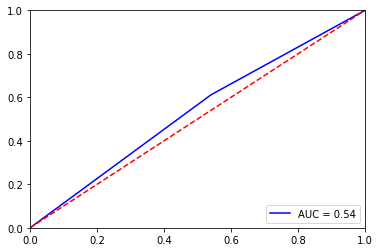

In [309]:
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [312]:
rf.score(test_x, test_y)

0.5335267569310123

In [313]:
pred_y = rf.predict(test_x)

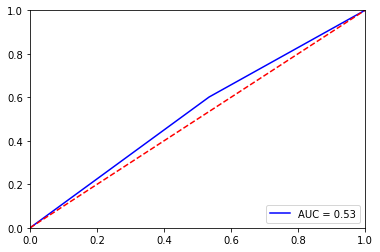

In [314]:
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [316]:
nb = MultinomialNB()

In [317]:
nb.fit(train_x, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [318]:
nb.score(test_x, test_y)

0.5357833655705996